# House price prediction with Flask

In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(20,10)

C:\Users\Priya\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Priya\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Priya\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
df1=pd.read_csv('bglr.csv')#read dataset
df1.head()#view first few data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
# to tell the dimensions of dataset
df1.shape

(13320, 9)

In [5]:
# grouping data
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
# dropping data which are not needed
df=df1.drop(['society','balcony','availability'],axis='columns')
df.head(5)

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df.isnull().sum() # gives all column null count

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
# remove all NaN values from my dataframe
df3=df.dropna()
df3.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df3['BHK']=df3['size'].apply(lambda x: x.split(' ')[0])
df3.head()

C:\Users\Priya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,area_type,location,size,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [12]:
def flt(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
df3[~df3['total_sqft'].apply(flt)].head(20)

,area_type,location,size,total_sqft,bath,price,BHK
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Built-up Area,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Super built-up Area,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Built-up Area,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [14]:
def convert(x):
    v=x.split('-')
    if len(v)==2:
        temp=float(v[0])+float(v[1])
        return(temp/2)
    try:
        return float(x)
    except:
        return None

In [15]:
df4=df3.copy()

In [16]:
df4['total_sqft']=df4['total_sqft'].apply(convert)
df4.head()

,area_type,location,size,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [17]:
df4['BHK']=pd.to_numeric(df3['BHK'])
df4['BHK'].dtype

dtype('int64')

In [18]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,area_type,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [19]:
len(df5['location'].unique())

1304

In [20]:
df5.location=df5.location.apply(lambda y:y.rstrip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats #looking at data points

location
Whitefield                            534
Sarjapur  Road                        392
Electronic City                       302
Kanakpura Road                        266
Thanisandra                           233
                                     ... 
Konappana Agrahara                      1
Kodanda Reddy Layout                    1
Kirloskar layout, Basaveshwarnagar      1
Kengeri Satellite Town Stage II         1
 Anekal                                 1
Name: location, Length: 1304, dtype: int64

In [21]:
len(location_stats[location_stats<10])

1051

In [22]:
location_stats_less_than_10=(location_stats[location_stats<10])
location_stats_less_than_10

location
Mathikere                             9
2nd Phase JP Nagar                    9
Gollahalli                            9
Yemlur                                9
Ejipura                               9
                                     ..
Konappana Agrahara                    1
Kodanda Reddy Layout                  1
Kirloskar layout, Basaveshwarnagar    1
Kengeri Satellite Town Stage II       1
 Anekal                               1
Name: location, Length: 1051, dtype: int64

In [23]:
len(df5['location'].unique())

1304

In [24]:
df5.location=df5.location.apply(lambda z: 'other' if z in location_stats_less_than_10 else z)
len(df5.location.unique())

254

In [25]:
df5[df5.total_sqft/df5.BHK<300].head()# Checking misleading values or data outliers


,area_type,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Plot Area,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [26]:
# average 1BHK will be 300, with this data removing data outliers
df6=df5[~(df5.total_sqft/df5.BHK<300)]
df6.head()

,area_type,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [27]:
df6.shape

(12502, 8)

In [28]:
# removing misleading values with respect to price per sqft
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [29]:
# min value is 256 which is not possible and max is 1176470 since its far more than mean, removing it
# we need to write a function
def remove_pps(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduce_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduce_df],ignore_index=True)
    return df_out
df7=remove_pps(df6)
df7.shape

(10226, 8)

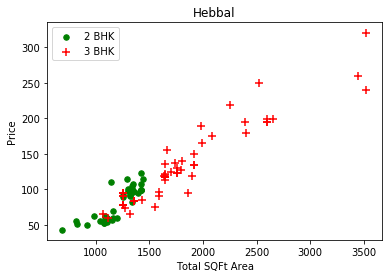

In [30]:
# plot a chart for looking at outliers
# where the 2bhk of same sqft area is costlier than 3bhk of same area
def scatter_plot(df,location):
    bhk2=df[(df.location==location)&(df.BHK==2)]
    bhk3=df[(df.location==location)&(df.BHK==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='green',label='2 BHK',s=30)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='red',marker='+',label='3 BHK',s=50)
    matplotlib.rcParams['figure.figsize']=(8,5)
    plt.xlabel('Total SQFt Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
scatter_plot(df7,'Hebbal')

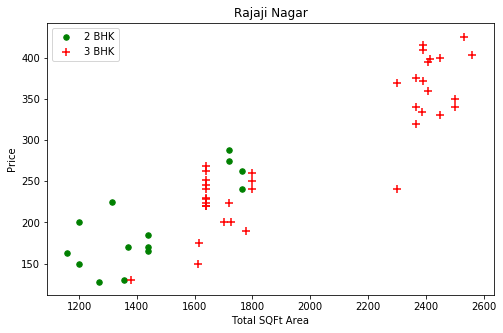

In [31]:
scatter_plot(df7,'Rajaji Nagar')

In [32]:
# took random places and saw the outliers
# to remove these outliers
# create a dictionary with BHK as key, mean,std,count as values

In [33]:
def remove_bhk(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8=remove_bhk(df7)
df8.shape

(7380, 8)

In [34]:
df8.price_per_sqft.describe()

count     7380.000000
mean      6122.145410
std       2437.397778
min       1300.000000
25%       4588.679245
50%       5666.666667
75%       6884.813728
max      24509.803922
Name: price_per_sqft, dtype: float64

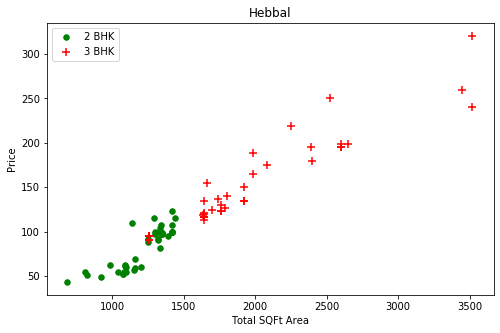

In [35]:
#plot after removing misleading points
scatter_plot(df8,'Hebbal')

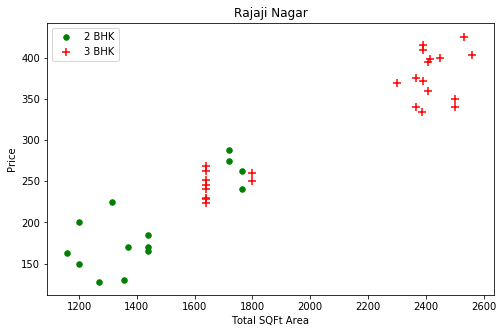

In [36]:
scatter_plot(df8,'Rajaji Nagar')

Text(0, 0.5, 'Count')

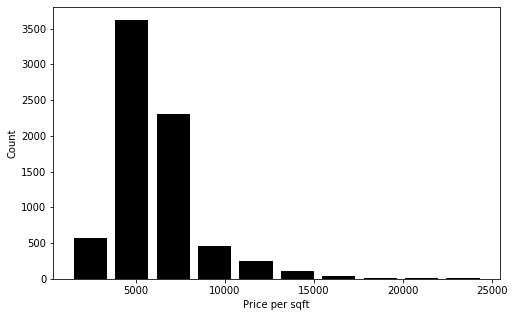

In [37]:
#plot histogram to find how many houses are there in persqft
plt.hist(df8['price_per_sqft'],rwidth=0.8,color='k')
plt.xlabel('Price per sqft')
plt.ylabel('Count')

In [38]:
# outliers with respect to bathroom
# no. of bathrooms more than nBHK+2 (i.e 3 bath for 2bhk is allowed) then remove those
df8[df8.bath>df8.BHK+2]

,area_type,location,size,total_sqft,bath,price,BHK,price_per_sqft
597,Plot Area,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1653,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5299,Built-up Area,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6776,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8465,Super built-up Area,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [39]:
df8.shape

(7380, 8)

In [40]:
df9=df8[df8.bath<df8.BHK+2]
df9.shape

(7302, 8)

In [41]:
# now the data cleaning is over, before moving on to training datas remove unwanted columns
df10=df9.drop(['area_type','size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,BHK
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


In [42]:
df10.shape

(7302, 5)

In [43]:
# since there are strings in dataframe and cannot be used for machine learning
# one hot encoding is used which is otherwise called dummy
dummy=pd.get_dummies(df10.location)
dummy.head(5)

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df11=pd.concat([df10,dummy.drop('other',axis='columns')],axis='columns')
df11.head(3)

,location,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df12=df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df12.shape

(7302, 257)

In [47]:
x=df12.drop('price',axis='columns') # for model training remove price
x.shape

(7302, 256)

In [48]:
y=df12.price
y.shape

(7302,)

In [49]:
#scikit learn library for training and testing
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [51]:
# linear regression
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(x_train,y_train)#training model based on linear regression
clf.score(x_test,y_test)

C:\Users\Priya\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Priya\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

0.8432266578791825

In [52]:
# cross validation to improve score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=10)
cross_val_score(clf,x,y,cv=cv)

array([0.84322666, 0.81689978, 0.86476811, 0.85350281, 0.79784626,
       0.86516869, 0.8787332 , 0.8668552 , 0.85117748, 0.79524653])

In [53]:
# predict values for few samples by defining a function
def pred(location,sqft,bath,bhk):
    x=df12.drop('price',axis='columns')
    loc_index=np.where(x.columns==location)[0][0]
    x=np.zeros(len(x.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return clf.predict([x])[0]

In [54]:
print(pred('1st Phase JP Nagar',1000,2,2), "lakhs is the cost")

79.7802678834934 lakhs is the cost


In [55]:
print(pred('Hebbal',4000,3,3), "lakhs is the cost")

308.7578917933388 lakhs is the cost


In [56]:
print(pred('Indira Nagar',1000,2,2), "lakhs is the cost")

186.23126114809153 lakhs is the cost


In [64]:
print(pred('Indira Nagar',1000,3,3), "lakhs is the cost")

191.15326431907928 lakhs is the cost


In [58]:
# transfering my model with pickle
import pickle

In [59]:
with open('bglr.pickle','wb') as f:
    pickle.dump(clf,f)

In [60]:
# we need column info also along with regression module
import json
columns={
    'data_columns':[col.lower()for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))